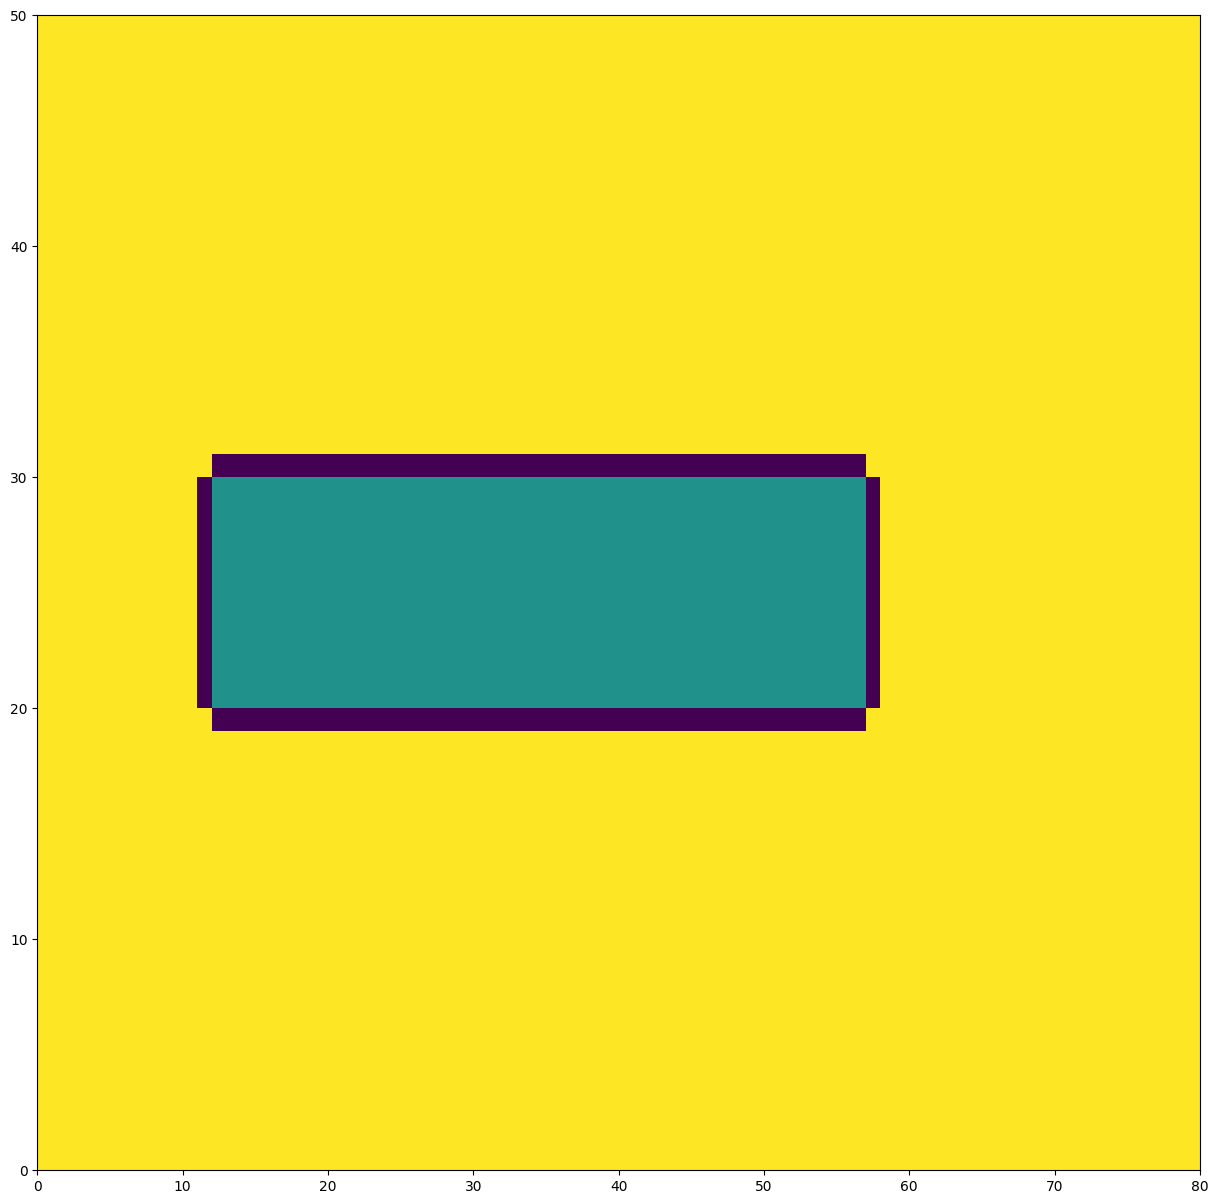

Residual:  0.804833898388986 Mass Residual: -0.0008018876035741232 Mass: -269.6241021677459  Continuity:  12747.16991454897  at  100 th iteration   Time:  1.7942251999998007
Residual:  0.35936005471088006 Mass Residual: -0.00035491179411056633 Mass: -255.90526098142269  Continuity:  11849.84319904832  at  200 th iteration   Time:  3.6248058000001038
Residual:  0.1861088773484278 Mass Residual: -0.00018131686302775196 Mass: -249.38471470598057  Continuity:  11422.114045360066  at  300 th iteration   Time:  5.265789399999903
Residual:  0.10342926347391362 Mass Residual: -8.969589310825933e-05 Mass: -246.16069217366973  Continuity:  11210.125880000523  at  400 th iteration   Time:  6.941920400000072
Residual:  0.06081152616896168 Mass Residual: -4.263587890922412e-05 Mass: -244.60796691424704  Continuity:  11107.025164795768  at  500 th iteration   Time:  8.705724800000098
Residual:  0.038245530421875784 Mass Residual: -1.911332223342895e-05 Mass: -243.89020687070635  Continuity:  11058.3

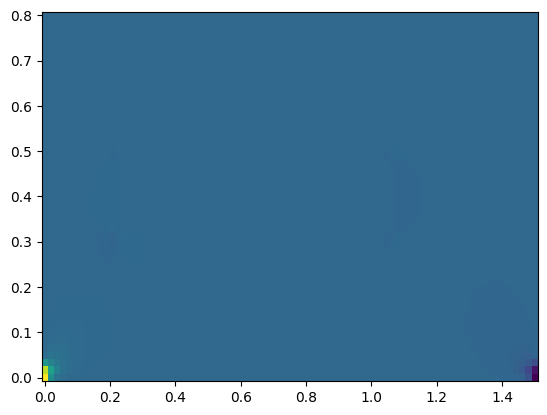

In [1]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from solvers import PDE_2D_Solver
from Differentials import *
from object import *
from visiual import Map


# block_coordinates = [(0,0),(0,5),(5,5),(5,0)]
block_coordinates = [(0,0),(0,0.8),(1.5,0.8),(1.5,0)]

# print(list(block_coordinates[3]))
node_numbers = [80, 50]

space = Mesh(block_coordinates, node_numbers) #it seems like a one block. Build more sopisticated block type structures
# space.nonuniform_block_mesh_2D(-1.2, -1.4)
# space.nonuniform_mesh_2D(-1.2, -1.4)

#|----------------------------------------------
a, b = space.nonuniform_block_mesh_2D(1, 1)
circle = object()
rectangle = object()
# circle.circle(0.15, (0.4,0.4))
property_map = Map(space)
rectangle.rectang(0.9, 0.2, (0.65,0.4))
# property_map.create_object(circle)
property_map.create_object(rectangle)
# rectangle.rectang(1.0, 0.05, (0.5,0.1))
# property_map.create_object(rectangle)
property_map.show()
#|-----------------------------------------------

# property_map.show()
# circle.circle(0.4, (3.4,2.4))
# space.create_object(circle)
# circle.circle(0.4, (2.4,1.4))
# space.create_object(circle)
#


BCs = {'W': 'D', 'S': 'N', 'E': 'D', 'N': 'D'}
BCs_values = {'W': 1, 'S': 0, 'E': 0.1, 'N': 0.4}


solution = PDE_2D_Solver(space,BCs)
solution.solver(BCs_values, "potensial", property_map, 1.4, 1e-7, itteration_type="nodebynode")

# solution.countour()

# compt_dom = Mesh(block_coordinates, node_numbers)
# compt_dom.uniform_block_mesh_2D()

# compt_dom.plot2D()
# space.plot2D()
# compt_dom.Jacobi(a, b)
# print(compt_dom.Jacobian)

# print(OneDcentraldiff(compt_dom.matricies[0], a))
# print(OneDcentraldiff(compt_dom.matricies[0], b, axis=1))
# print(OneDcentraldiff(compt_dom.matricies[1], a))
# print(OneDcentraldiff(compt_dom.matricies[1], -b, axis=1))
# compt_dom.matricies[1] 




In [ ]:
solution.velocityfield("stream")
solution.plot2D("stream")
solution.stream()
solution.quiver()

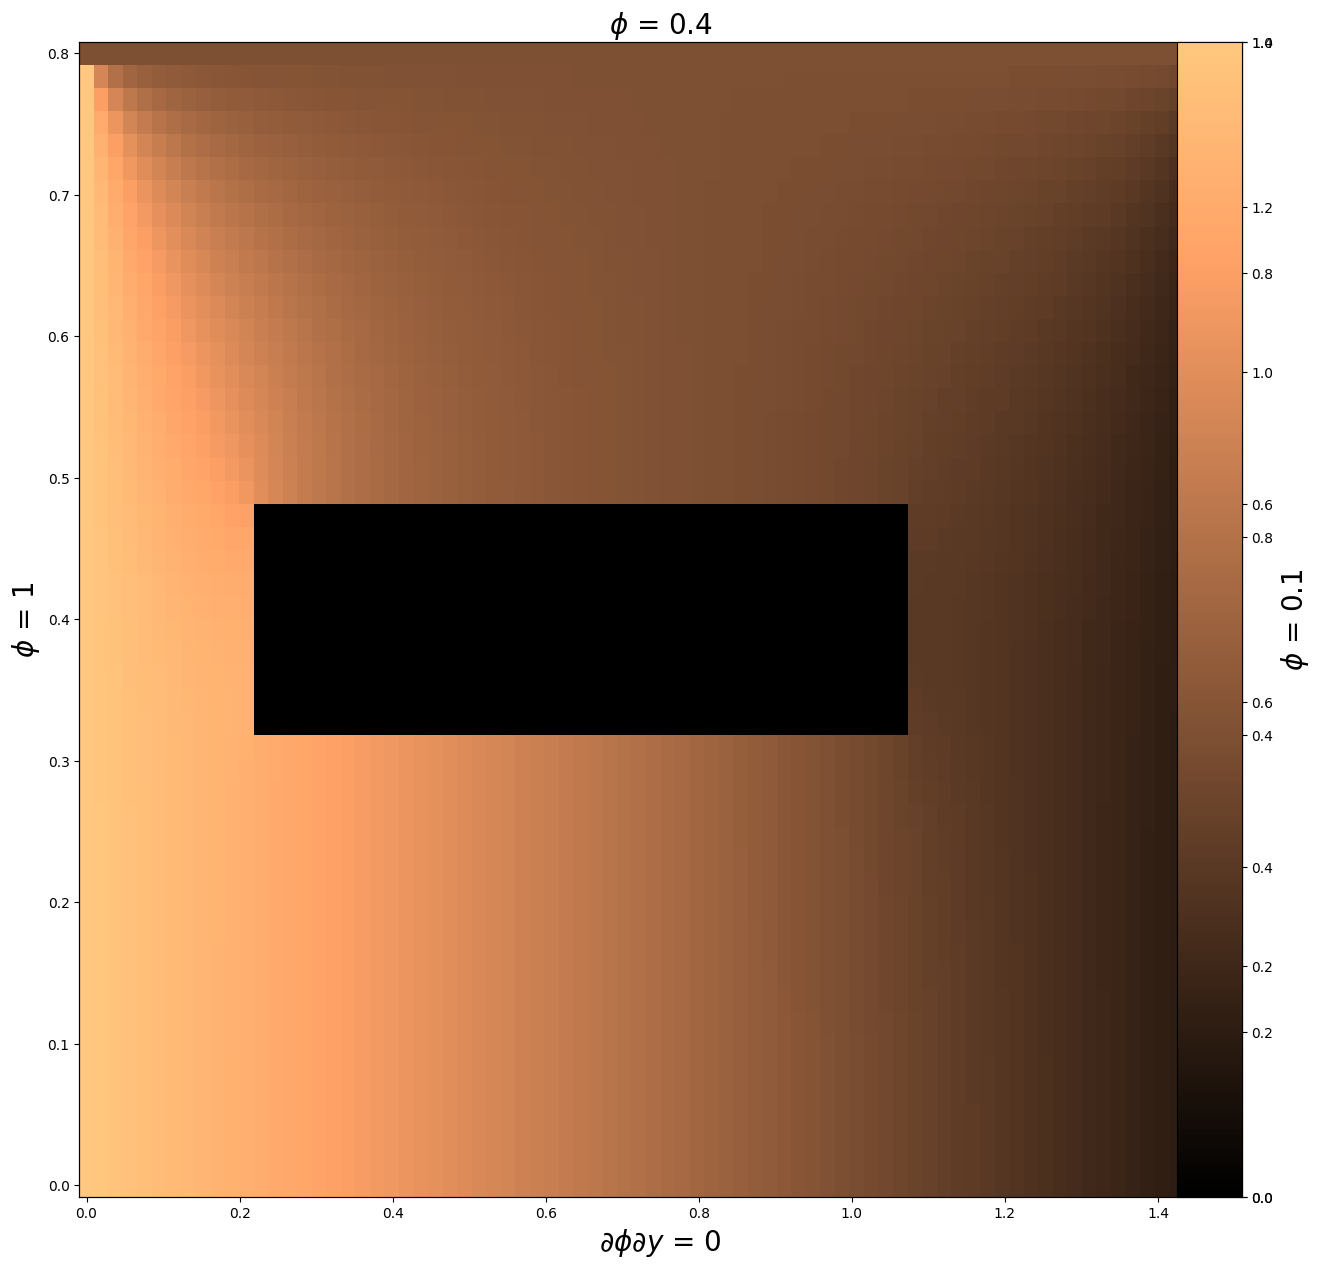

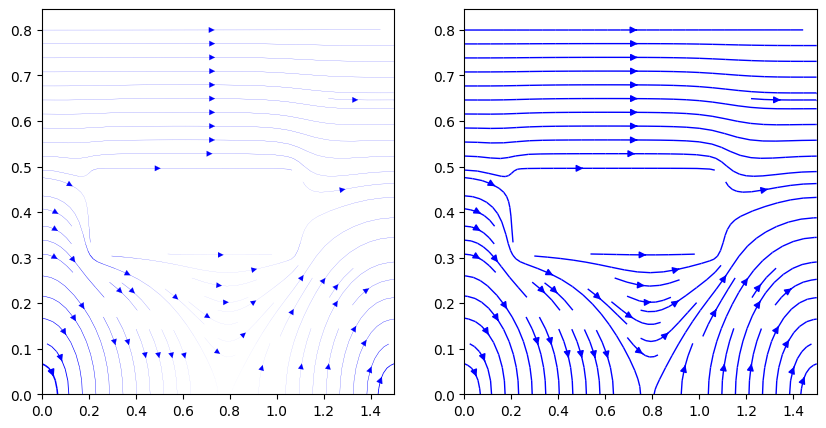

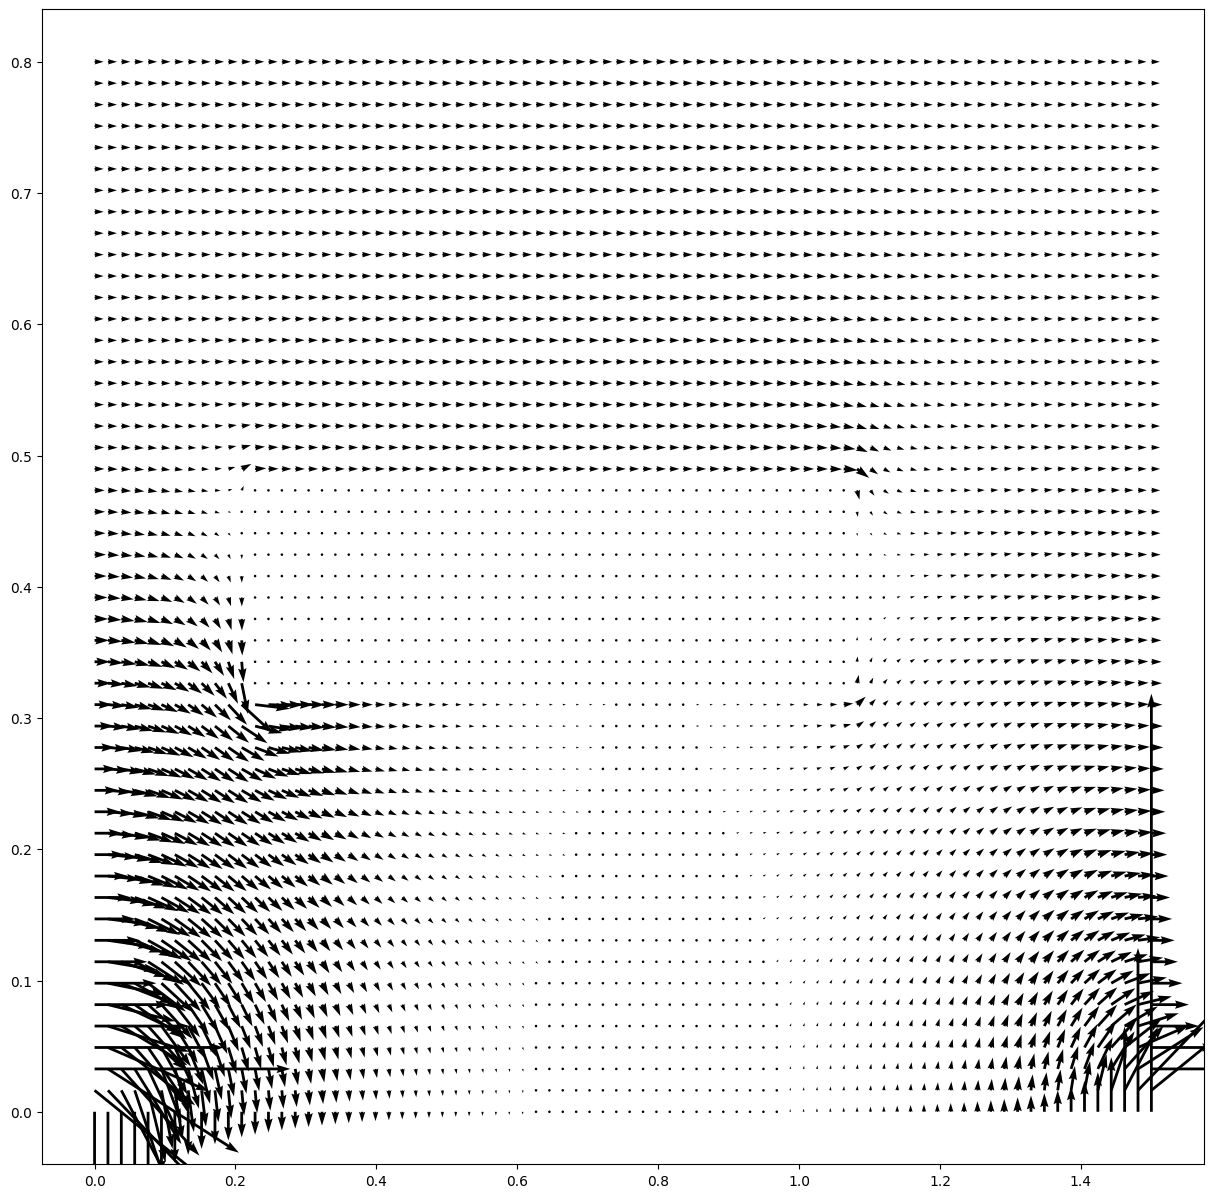

In [2]:
solution.velocityfield("potensial")
solution.plot2D("potensial")
solution.streamplot()
solution.quiver()
phii = solution.solution
a = solution.velocity[:,:,0]
cont = solution.continuity

In [ ]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from Domain import ElippticMesh
from solvers import PDE_2D_Solver
from Differentials import *
from object import *
from visiual import Map
import scipy as sp
from importtools import import_geometry
from solvers import eliptic_PDE_solver


def circles(x, y, r):
    th = np.linspace(0, 2 * np.pi, 200)
    xunit = r * np.cos(th) + x
    yunit = r * np.sin(th) + y
    circle_list = np.array([xunit, yunit]).T
    return circle_list

naca0012 = import_geometry('naca0012.txt')
naca0012 = closeshape_interpolation(naca0012, 200)

circleee = circles(3, 3, 3)

naca0012[:,:] = naca0012[:,:] * 1.8
naca0012[:,0] += 2.5
naca0012[:,1] += 3

node_numbers = [200, 30]
space_trial = ElippticMesh(node_numbers, naca0012, circleee) 
space_trial.create_elipticmesh()
X = space_trial.X
space_trial.plot_mesh()

BCvalues = {'Out': 1, 'In': 0, 'Cut1': 0, 'Cut2': 0}
stream_naca0012 = eliptic_PDE_solver(space_trial, BCvalues)
stream_naca0012.solver()
stream_naca0012.plot2D()







# block_coordinates = [(0,-0.8),(0,0.8),(3.5,0.8),(3.5,-0.8)]
# node_numbers = [200, 300]
# space_trial = Mesh(block_coordinates, node_numbers) 

# a, b = space_trial.uniform_block_mesh_2D()



# airfoil = object()
# airfoil.airfoil(naca0012, scale=2.3)
# airfoil_map = Map(space_trial)
# airfoil_map.create_object(airfoil)
# airfoil_map.show()

# area_matrix = airfoil_map.area


# BCs = {'W': 'D', 'S': 'N', 'E': 'D', 'N': 'N'}
# BCs_values = {'W': 1, 'S': 0, 'E': 0, 'N': 0}

# solution = PDE_2D_Solver(space_trial,BCs)
# solution.solver(BCs_values, "potensial", airfoil_map, 1.5, 0.12, itteration_type="nodebynode")

# solution.velocityfield("potensial")
# solution.plot2D("potensial")
# solution.stream()
# solution.quiver()




In [ ]:
import numpy as np
import pickle as pkl

#save the output data solution.solution to a file. the file name contains the solution type and the number of nodes, the object name solved and the BCs, and the BCs values.
#use parameters to change the file name 

def save_data(solution, solution_type, BCs, BCs_values, object_name, node_numbers):
    
    file_name = solution_type + "_" + str(node_numbers[0]) + "_" + str(node_numbers[1]) + "_" + object_name + "_"
    np.save(file_name, solution)
    print("data saved to file: " + file_name)

#load the data from the file
def load_data(file_name):
    data = np.loadtxt(file_name, delimiter=",")
    print("data loaded from file: " + file_name)
    return data

#save the data to a file
# save_data(solution.solution, "potensial", BCs, BCs_values, "airfoil", node_numbers)
save_data(solution.solution, "potensial", BCs, BCs_values, "airfoil_smalled", node_numbers)

# with open("airfoil.pkl", "wb") as f:
    # pkl.dump(solution, f)






In [ ]:
import pickle as pkl
with open("airfoil.pkl", "rb") as f:
    solution_temp = pkl.load(f)

In [ ]:
solution_temp.velocityfield("potensial")
solution_temp.plot2D("potensial")
solution_temp.stream()
solution_temp.quiver()


In [ ]:
# a = airfoil_map.area